In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import geopandas as gpd
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
a = ["%.2d" % i for i in range(1,13)]
a.remove('02')
a.remove('07')
a

['01', '03', '04', '05', '06', '08', '09', '10', '11', '12']

In [3]:
month =[ '2015{}'.format(i) for i in a]
month

['201501',
 '201503',
 '201504',
 '201505',
 '201506',
 '201508',
 '201509',
 '201510',
 '201511',
 '201512']

In [43]:
data = {}
for i in month:
    data[i] = pd.read_csv('data/'+ i )
    data[i] = data[i][['id','price']]
    data[i] = data[i].rename(columns = {'price':i})

In [139]:
ny = pd.read_csv('data/201501' )

In [143]:
ny = ny[['longitude','latitude','zipcode']]

In [145]:
ny.head()

,longitude,latitude,zipcode
0,-73.964754,40.756852,10022
1,-73.941014,40.830599,NaN
2,-73.924120,40.692189,11221
3,-74.002592,40.734751,10011
4,-73.997836,40.745282,10011


In [162]:
time_data = pd.merge(data['201501'],data['201503'], on= 'id', how = 'inner')
time_data

,id,201501,201503
0,1069266,$160.00,$165.00
1,1846722,$105.00,$100.00
2,2061725,$58.00,$58.00
3,44974,$185.00,$185.00
4,68914,$165.00,$165.00
5,4832596,$80.00,$80.00
6,2562510,$120.00,$120.00
7,3005360,$150.00,$150.00
8,1322641,$150.00,$150.00
9,234327,$80.00,$80.00


In [166]:
for i in month[2:]:
    time_data = pd.merge(time_data,data[i], on= 'id', how = 'inner')   # outer will bring a lot NAN
time_data.head()

,id,201501,201503,201504,201505,201506,201508,201509,201510,201511,201512
0,1069266,$160.00,$165.00,$145.00,$190.00,$170.00,$170.00,$180.00,$170.00,$185.00,$185.00
1,2061725,$58.00,$58.00,$58.00,$58.00,$58.00,$58.00,$58.00,$58.00,$58.00,$58.00
2,68914,$165.00,$165.00,$165.00,$165.00,$165.00,$165.00,$165.00,$165.00,$165.00,$165.00
3,2000287,$110.00,$95.00,$95.00,$99.00,$99.00,$99.00,$99.00,$125.00,$125.00,$125.00
4,809929,$200.00,$220.00,$220.00,$220.00,$220.00,$190.00,$190.00,$210.00,$210.00,$210.00


In [171]:
for i in month:
    time_data[i] = time_data[i].map(lambda x: x.lstrip('$'))

In [172]:
for i in month:
    time_data[i] = pd.to_numeric(time_data[i] , errors = 'coerce')

In [173]:
type(time_data[i][1])

numpy.float64

In [174]:
time_data.head(3)

,id,201501,201503,201504,201505,201506,201508,201509,201510,201511,201512
0,1069266,160.0,165.0,145.0,190.0,170.0,170.0,180.0,170.0,185.0,185.0
1,2061725,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0
2,68914,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0


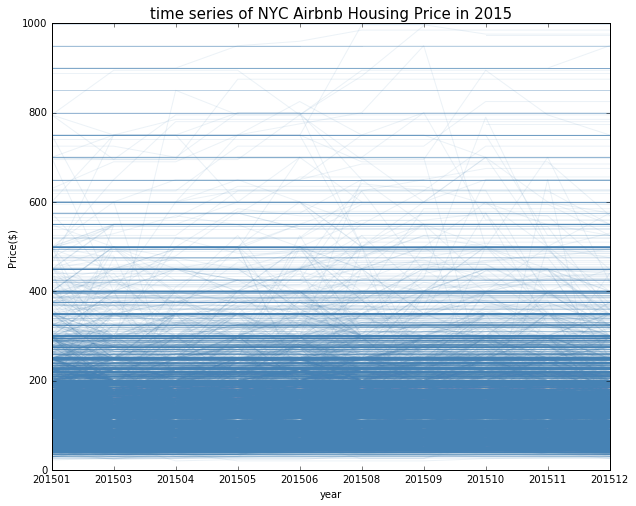

In [120]:
plt.figure(figsize = (10,8))
for i in range(len(time_data)):
    #t= clusters.labels_[i]
    plt.plot(np.arange(10) ,time_data.iloc[i,1:],color = 'steelblue', alpha =0.1)
    plt.title('time series of NYC Airbnb Housing Price in 2015',fontsize =15)
    plt.ylabel('Price($)',fontsize =10)
    plt.xlabel('year',fontsize =10)
    #plt.xlim(1,11)
    plt.xticks(arange(10),month)

In [113]:
time_data_standard = time_data.iloc[:,1:].copy()

In [114]:
time_data_standard

,201501,201503,201504,201505,201506,201508,201509,201510,201511,201512
0,160.0,165.0,145.0,190.0,170.0,170.0,180.0,170.0,185.0,185.0
1,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0
2,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0
3,110.0,95.0,95.0,99.0,99.0,99.0,99.0,125.0,125.0,125.0
4,200.0,220.0,220.0,220.0,220.0,190.0,190.0,210.0,210.0,210.0
5,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,100.0
6,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
7,195.0,175.0,175.0,195.0,195.0,195.0,195.0,235.0,235.0,235.0
8,90.0,75.0,75.0,75.0,75.0,62.0,62.0,62.0,62.0,62.0
9,125.0,125.0,125.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0


In [115]:
for i in range(len(time_data_standard)):
    mean = time_data_standard.iloc[i].mean()
    std = time_data_standard.iloc[i].std()
    time_data_standard.iloc[i] = (time_data_standard.iloc[i] - mean)/ std

In [116]:
time_data_standard

,201501,201503,201504,201505,201506,201508,201509,201510,201511,201512
0,-0.883585,-0.515425,-1.988067,1.325378,-0.147264,-0.147264,0.589057,-0.147264,0.957217,0.957217
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.222791,-0.929578,-0.929578,-0.622280,-0.622280,-0.622280,-0.622280,1.375161,1.375161,1.375161
4,-0.751742,0.918796,0.918796,0.918796,0.918796,-1.587011,-1.587011,0.083527,0.083527,0.083527
5,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,2.846050
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.340777,-1.192720,-1.192720,-0.340777,-0.340777,-0.340777,-0.340777,1.363108,1.363108,1.363108
8,2.095291,0.523823,0.523823,0.523823,0.523823,-0.838116,-0.838116,-0.838116,-0.838116,-0.838116
9,-1.449138,-1.449138,-1.449138,0.621059,0.621059,0.621059,0.621059,0.621059,0.621059,0.621059


In [159]:
time_data_standard = pd.DataFrame(np.nan_to_num(time_data_standard))

In [160]:
time_data_standard.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.883585,-0.515425,-1.988067,1.325378,-0.147264,-0.147264,0.589057,-0.147264,0.957217,0.957217,2.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.222791,-0.929578,-0.929578,-0.622280,-0.622280,-0.622280,-0.622280,1.375161,1.375161,1.375161,2.0
4,-0.751742,0.918796,0.918796,0.918796,0.918796,-1.587011,-1.587011,0.083527,0.083527,0.083527,4.0


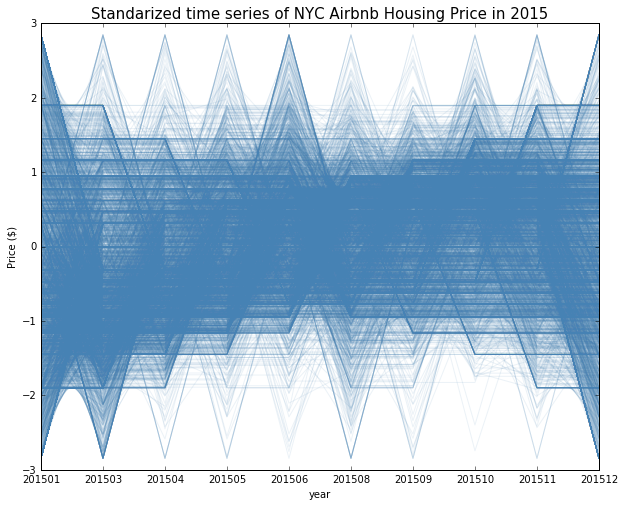

In [121]:
plt.figure(figsize = (10,8))
for i in range(len(time_data_standard)):
    #t= clusters.labels_[i]
    plt.plot(np.arange(10) ,time_data_standard.iloc[i],color = 'steelblue', alpha =0.1)
    plt.title('Standarized time series of NYC Airbnb Housing Price in 2015',fontsize =15)
    plt.ylabel('Price ($)',fontsize =10)
    plt.xlabel('year',fontsize =10)
    #plt.xlim(1,11)
    plt.xticks(arange(10),month)

In [64]:
#time_data_standard = time_data_standard.dropna()

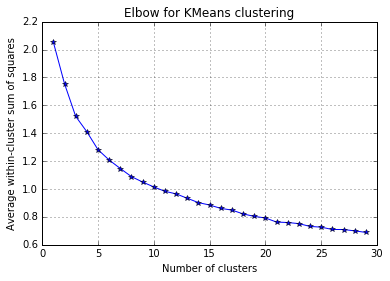

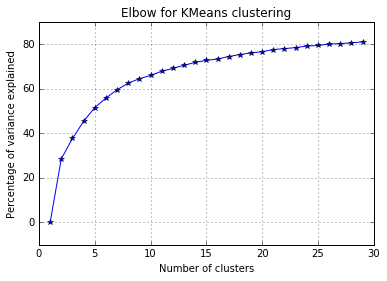

In [122]:
elbow(time_data_standard, range(1,30))

In [123]:
n = 5
clusters =KMeans(n_clusters= n).fit(time_data_standard)
cmap = plt.cm.Set3(np.linspace(0,1,n))
clusters.labels_

array([2, 0, 0, ..., 3, 3, 0], dtype=int32)

In [124]:
time_data_standard['label'] = clusters.labels_

In [148]:
ny.iloc[a.index]

,longitude,latitude,zipcode
4,-73.997836,40.745282,10011
8,-73.986418,40.726022,10003
14,-73.984443,40.760679,10019
17,-73.927017,40.862270,10040
20,-74.005486,40.706879,10038
22,-73.951025,40.726067,11222
23,-73.928537,40.698630,11206
25,-73.994848,40.718125,10013
29,-74.003257,40.723450,10013
30,-74.006676,40.711173,10038


3503
1631
1865
725
1113


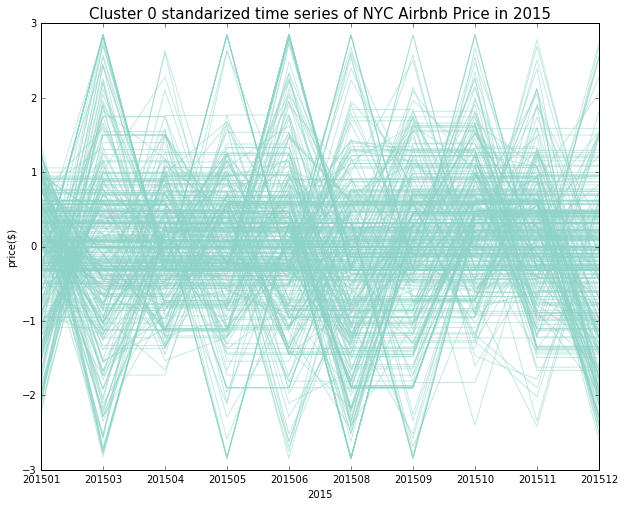

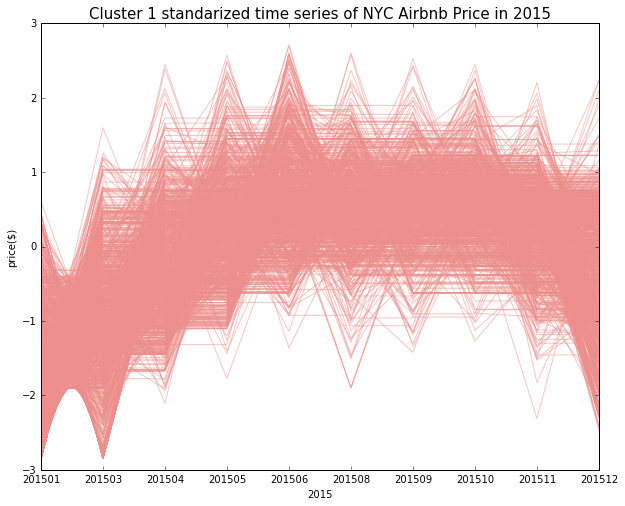

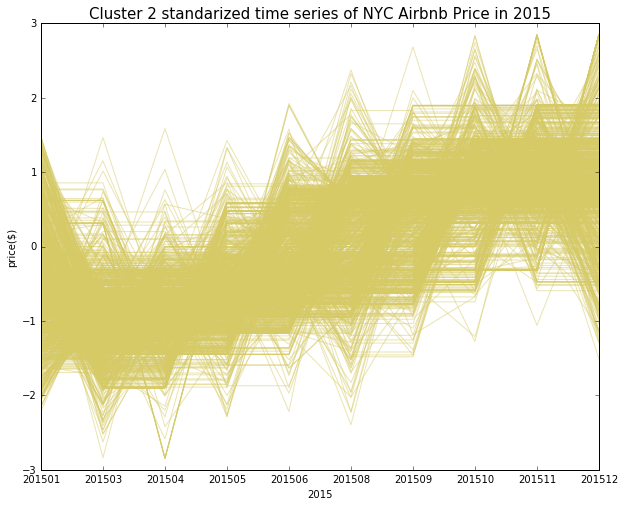

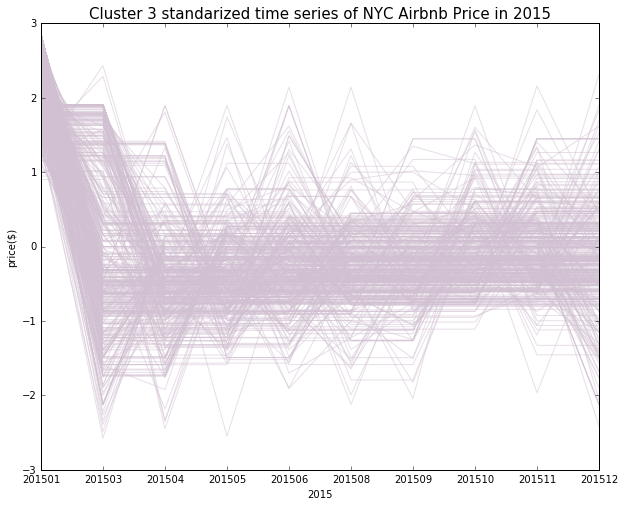

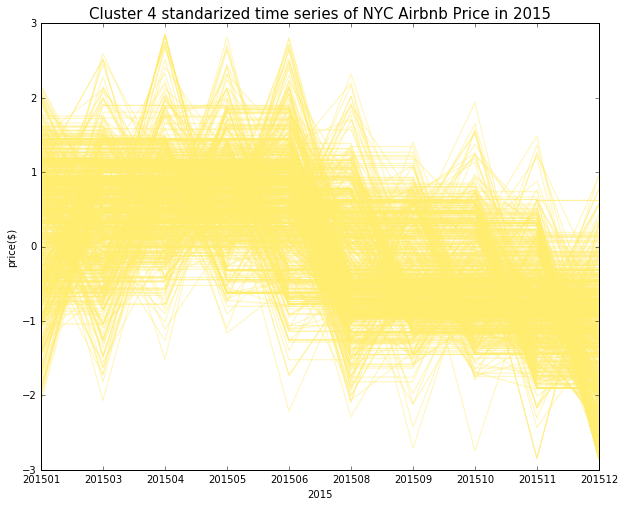

In [149]:
for x in range(5):

    a = time_data_standard[time_data_standard.label== x]
    print len(a)
    loc = ny.iloc[a.index]
    
    filename = str(x) +'.csv'
    loc.to_csv(filename)
#plot with 5 clusters    
    plt.figure(figsize = (10,8))
    for i in range(len(a)):
    
        plt.plot(np.arange(10) ,a.iloc[i,:-1], color=cmap[x][0:3],alpha = 0.5)
        title_text = 'Cluster ' + str(x) +' standarized time series of NYC Airbnb Price in 2015'
        plt.title(title_text,fontsize =15)
        plt.ylabel('price($)',fontsize =10)
        plt.xlabel('2015',fontsize =10)
        plt.xticks(arange(10),month)

In [175]:
time_data = time_data.dropna().reset_index(drop = True)

In [176]:
time = time_data.iloc[:,1:]
time

,201501,201503,201504,201505,201506,201508,201509,201510,201511,201512
0,160.0,165.0,145.0,190.0,170.0,170.0,180.0,170.0,185.0,185.0
1,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0
2,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0
3,110.0,95.0,95.0,99.0,99.0,99.0,99.0,125.0,125.0,125.0
4,200.0,220.0,220.0,220.0,220.0,190.0,190.0,210.0,210.0,210.0
5,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,100.0
6,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
7,195.0,175.0,175.0,195.0,195.0,195.0,195.0,235.0,235.0,235.0
8,90.0,75.0,75.0,75.0,75.0,62.0,62.0,62.0,62.0,62.0
9,125.0,125.0,125.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0


In [61]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

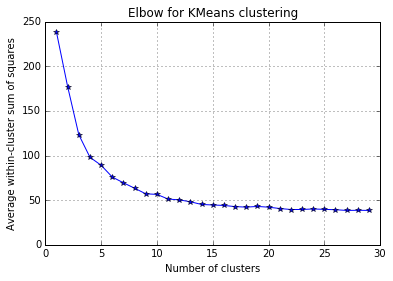

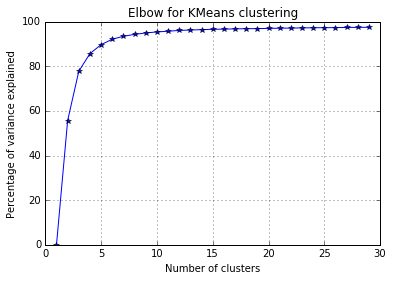

In [20]:
elbow(time, range(1,30))

#### choose K=4

In [177]:
n = 4
clusters =KMeans(n_clusters= n, random_state=123).fit(time)
cmap = plt.cm.Set3(np.linspace(0,1,n))
clusters.labels_

array([3, 0, 3, ..., 3, 0, 0], dtype=int32)

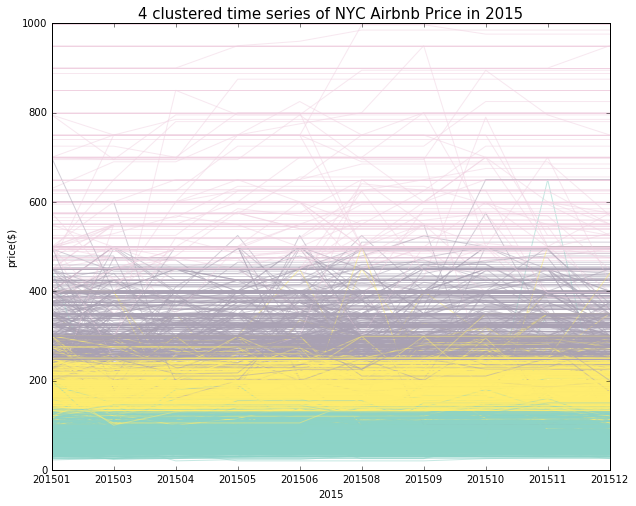

In [178]:
#plot with 4 clusters    
plt.figure(figsize = (10,8))
for i in range(len(time_data)):
    t= clusters.labels_[i]
    plt.plot(np.arange(10) ,time_data.iloc[i,1:], color=cmap[t][0:3],alpha = 0.5)
    plt.title('4 clustered time series of NYC Airbnb Price in 2015',fontsize =15)
    plt.ylabel('price($)',fontsize =10)
    plt.xlabel('2015',fontsize =10)
    plt.xticks(arange(10),month)

In [179]:
clusters.labels_

array([3, 0, 3, ..., 3, 0, 0], dtype=int32)

In [180]:
time_data['cluster_4'] = clusters.labels_
time_data.head()

,id,201501,201503,201504,201505,201506,201508,201509,201510,201511,201512,cluster_4
0,1069266,160.0,165.0,145.0,190.0,170.0,170.0,180.0,170.0,185.0,185.0,3
1,2061725,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,0
2,68914,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,3
3,2000287,110.0,95.0,95.0,99.0,99.0,99.0,99.0,125.0,125.0,125.0,0
4,809929,200.0,220.0,220.0,220.0,220.0,190.0,190.0,210.0,210.0,210.0,3


In [181]:
count_4= time_data.groupby('cluster_4').count()
count_4

,id,201501,201503,201504,201505,201506,201508,201509,201510,201511,201512
cluster_4,,,,,,,,,,,
0,4499,4499,4499,4499,4499,4499,4499,4499,4499,4499,4499
1,959,959,959,959,959,959,959,959,959,959,959
2,213,213,213,213,213,213,213,213,213,213,213
3,3084,3084,3084,3084,3084,3084,3084,3084,3084,3084,3084


In [182]:
mean_4= time_data.groupby('cluster_4').mean()
mean_4

,id,201501,201503,201504,201505,201506,201508,201509,201510,201511,201512
cluster_4,,,,,,,,,,,
0,2359973,86.505668,84.795510,86.019115,87.192932,88.604134,88.018893,88.538564,89.242943,89.018893,87.106468
1,2294085,300.070907,299.994786,302.873827,306.505735,307.378519,307.264859,309.085506,312.861314,311.855057,307.350365
2,2266168,601.375587,608.483568,615.765258,621.215962,622.732394,625.544601,630.272300,628.591549,621.549296,616.474178
3,2235355,173.280156,171.511349,173.701362,176.126783,178.259079,177.263619,178.642996,180.738651,180.153372,177.890078


In [183]:
median_4 =  time_data.groupby('cluster_4').median()
median_4

,id,201501,201503,201504,201505,201506,201508,201509,201510,201511,201512
cluster_4,,,,,,,,,,,
0,2171582,85.0,85.0,85.0,86.0,89.0,88.0,89.0,89.0,89.0,85.0
1,2083999,295.0,295.0,295.0,299.0,299.0,299.0,299.0,300.0,300.0,299.0
2,2185842,565.0,575.0,575.0,575.0,575.0,579.0,585.0,579.0,575.0,560.0
3,1996468,170.0,170.0,174.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0


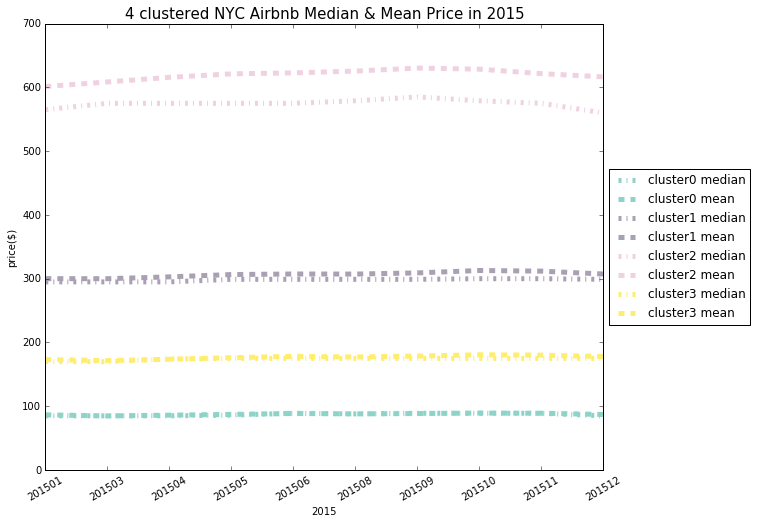

In [184]:
plt.figure(figsize = (10,8))
for i in range(n):
    plt.plot(np.arange(10) , median_4.iloc[i,1:22],color=cmap[i][0:3],linewidth = 5,
             linestyle = '-.',label = 'cluster' + str(i)+' median')
    plt.plot(np.arange(10) , mean_4.iloc[i,1:22],color=cmap[i][0:3],linewidth = 5,
             linestyle = '--',label = 'cluster' + str(i)+' mean')
    plt.title('4 clustered NYC Airbnb Median & Mean Price in 2015',fontsize =15)
    plt.ylabel('price($)',fontsize =10)
    plt.xlabel('2015',fontsize =10)
    plt.xticks(arange(10),month, rotation = 30)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
    #plt.plot(np.arange(10) ,max_4.iloc[i,1:22],color = 'orange',linewidth = 2)
    #plt.plot(np.arange(10) ,min_4.iloc[i,1:22],color = 'yellow',linewidth = 2)

In [185]:
mean_4.iloc[i,1:22]

201501    173.280156
201503    171.511349
201504    173.701362
201505    176.126783
201506    178.259079
201508    177.263619
201509    178.642996
201510    180.738651
201511    180.153372
201512    177.890078
Name: 3, dtype: float64

In [186]:
mean_4

,id,201501,201503,201504,201505,201506,201508,201509,201510,201511,201512
cluster_4,,,,,,,,,,,
0,2359973,86.505668,84.795510,86.019115,87.192932,88.604134,88.018893,88.538564,89.242943,89.018893,87.106468
1,2294085,300.070907,299.994786,302.873827,306.505735,307.378519,307.264859,309.085506,312.861314,311.855057,307.350365
2,2266168,601.375587,608.483568,615.765258,621.215962,622.732394,625.544601,630.272300,628.591549,621.549296,616.474178
3,2235355,173.280156,171.511349,173.701362,176.126783,178.259079,177.263619,178.642996,180.738651,180.153372,177.890078


In [187]:
bound = mean_4.copy()

In [188]:
bound.iloc[0] = 0
bound.iloc[1] = (mean_4.iloc[1]+ mean_4.iloc[3])/2
bound.iloc[2] = (mean_4.iloc[3]+ mean_4.iloc[0])/2
bound.iloc[3] = (mean_4.iloc[0]+ mean_4.iloc[2])/2
bound.loc[4] = 1000

In [189]:
del bound['id']

In [190]:
bound

,201501,201503,201504,201505,201506,201508,201509,201510,201511,201512
cluster_4,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,236.675531,235.753068,238.287594,241.316259,242.818799,242.264239,243.864251,246.799982,246.004215,242.620221
2,129.892912,128.153430,129.860239,131.659858,133.431607,132.641256,133.590780,134.990797,134.586133,132.498273
3,343.940627,346.639539,350.892187,354.204447,355.668264,356.781747,359.405432,358.917246,355.284094,351.790323
4,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000


range between:( 0.0 , 241.640416039 )
range between:( 241.640416039 , 132.130528279 )
range between:( 132.130528279 , 353.352390776 )
range between:( 353.352390776 , 1000.0 )


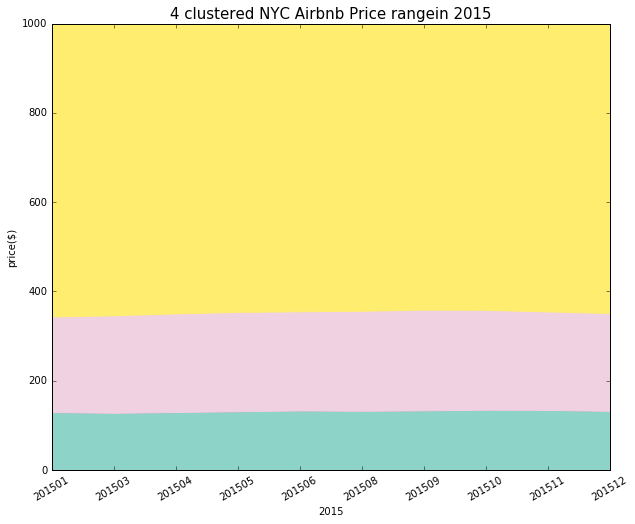

In [191]:
plt.figure(figsize = (10,8))
for i in range(4):
    x = range(10)
    y1 = bound.iloc[i]
    y2 = bound.iloc[i+1]
    print 'range between:(', y1.mean(),',',y2.mean(),')'
    plt.fill_between(x,y1,y2, color = cmap[i])
    plt.title('4 clustered NYC Airbnb Price rangein 2015',fontsize =15)
    plt.ylabel('price($)',fontsize =10)
    plt.xlabel('2015',fontsize =10)
    plt.xticks(arange(10),month,rotation = 30)

In [68]:
time_data.groupby('cluster_4').count()

,id,201501,201503,201504,201505,201506,201508,201509,201510,201511,201512
cluster_4,,,,,,,,,,,
0,959,959,959,959,959,959,959,959,959,959,959
1,4487,4487,4487,4487,4487,4487,4487,4487,4487,4487,4487
2,213,213,213,213,213,213,213,213,213,213,213
3,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096


In [ ]:
1302

In [69]:
count_4= time_data.groupby('cluster_4').count()
count_4 = pd.DataFrame(count_4.id)
count_4["index"] = [ "\$242-\$463","0-\$132", "\$463-\$999", "\$132-\$242"]
count_4 = count_4.set_index('index').sort()

count_4

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(....) is deprecated, use sort_index(.....)


,id
index,
0-\$132,4487
\$132-\$242,3096
\$242-\$463,959
\$463-\$999,213


In [64]:
# set alpha in color map
cmap1 = cmap.copy()
for i in range(4):
    cmap1[i,-1] = 0.5

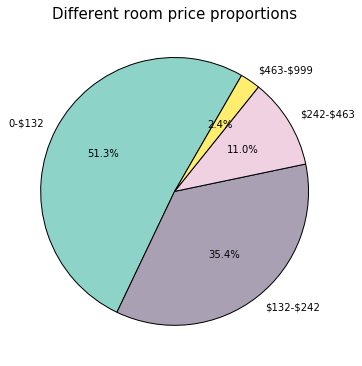

In [70]:
figure(1, figsize=(6,6))

# The slices will be ordered and plotted counter-clockwise.
#labels = "\$132-\$242", "\$463-\$999", "0-\$132", "\$242-\$463"
fracs = count_4.id
pie(fracs,labels = count_4.index, autopct='%1.1f%%',colors= cmap, startangle=60)
plt.title('Different room price proportions',fontsize = 15)

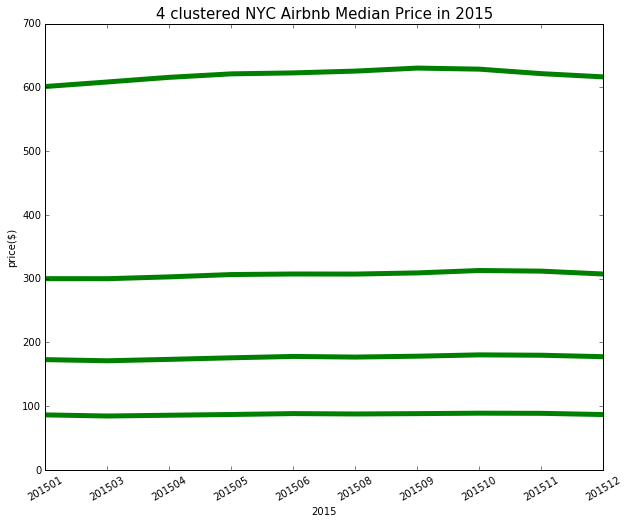

In [71]:
plt.figure(figsize = (10,8))
for i in range(n):
    plt.plot(np.arange(10) ,mean_4.iloc[i,1:22],color = 'green',linewidth = 5)
    plt.title('4 clustered NYC Airbnb Median Price in 2015',fontsize =15)
    plt.ylabel('price($)',fontsize =10)
    plt.xlabel('2015',fontsize =10)
    plt.xticks(arange(10),month,rotation = 30)
    
    #plt.plot(np.arange(10) ,max_4.iloc[i,1:22],color = 'orange',linewidth = 2)
    #plt.plot(np.arange(10) ,min_4.iloc[i,1:22],color = 'yellow',linewidth = 2)

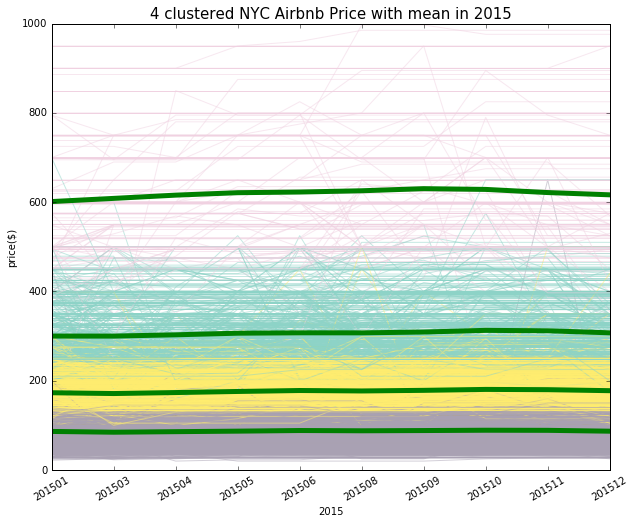

In [72]:
plt.figure(figsize = (10,8))
for i in range(len(time_data)):
    t= clusters.labels_[i]
    plt.plot(np.arange(10) ,time_data.iloc[i,1:11], color=cmap[t][0:3],alpha = 0.5)
    plt.title('4 clustered NYC Airbnb Price with mean in 2015',fontsize =15)
    plt.ylabel('price($)',fontsize =10)
    plt.xlabel('2015',fontsize =10)
    plt.xticks(arange(10),month,rotation = 30)
for i in range(n):
    plt.plot(np.arange(10) ,mean_4.iloc[i,1:22],color = 'green',linewidth = 5)
    #plt.plot(np.arange(10) ,max_4.iloc[i,1:22],color = 'orange',linewidth = 2)
    #plt.plot(np.arange(10) ,min_4.iloc[i,1:22],color = 'yellow',linewidth = 2)